# Lecture 9: Support vector machines (SVMs)

In [1]:
import datetime
now = datetime.datetime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2020-02-06 18:48:55


# Large margin classification

## Logistic regression with Hinge loss

Recall cost function for logistic regression, with $\ell_2$ regularisation, is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right]
+
\frac{\lambda}{2m}
\sum_{j=1}^n \theta_j^2,
$$


where 
$$\hat{p} = h_\theta(x) = \sigma(\theta^{\rm T} x) \quad \text{and} \quad \sigma(t) = \frac{1}{1+\exp{(-t)}}.$$

Recall, the bias $\theta_0$ is not regularised, i.e. sum over $j$ starts at 1.

### Plot sigmoid

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

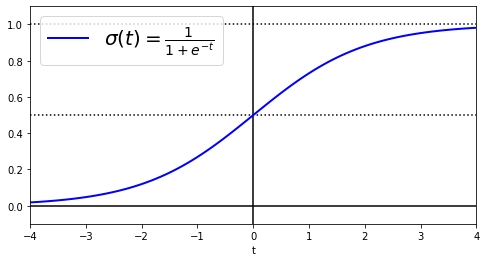

In [3]:
t = np.linspace(-4, 4, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(8, 4))
plt.plot([-4, 4], [0, 0], "k-")
plt.plot([-4, 4], [0.5, 0.5], "k:")
plt.plot([-4, 4], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-4, 4, -0.1, 1.1]);

## Hinge loss

Logistic regression cost function for reference: 
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right]
+
\frac{\lambda}{2m}
\sum_{j=1}^n \theta_j^2.
$$

### Positive training instances

For $y^{(i)}=1$, replace cost $-\log(\sigma(\theta^{\rm T} x))$ with *hinge loss* $\max(1 - \theta^{\rm T} x, 0)$.

For training, we want not just $\theta^{\rm T} x \geq 0$ but $\theta^{\rm T} x \geq 1$. 

### Exercise: plot cost $-\log(\sigma(\theta^{\rm T} x))$ and hinge loss $\max(1 - \theta^{\rm T} x, 0)$ .

Logistic regression cost function for reference: 
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right]
+
\frac{\lambda}{2m}
\sum_{j=1}^n \theta_j^2.
$$

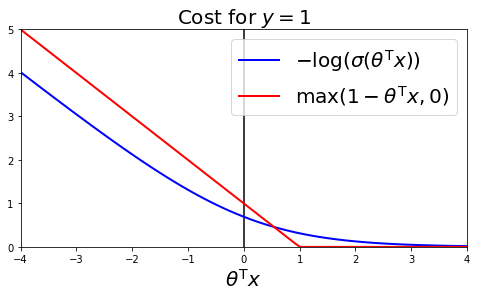

In [5]:
cost_one = -np.log(sig)
cost_one_hinge = np.maximum(1 - t, np.zeros(t.size))
plt.figure(figsize=(8, 4))
plt.plot([0, 0], [0, 5], "k-")
plt.plot(t, cost_one, "b-", linewidth=2, label=r"$-\log{(\sigma(\theta^{\rm T} x))}$")
plt.xlabel(r"$\theta^{\rm T} x$", fontsize=20)
plt.axis([-4, 4, 0, 5]);
plt.title('Cost for $y=1$', fontsize=20)
plt.plot(t, cost_one_hinge, "r-", linewidth=2, label=r"$\max(1-\theta^{\rm T} x, 0)$")
plt.legend(loc="upper right", fontsize=20);

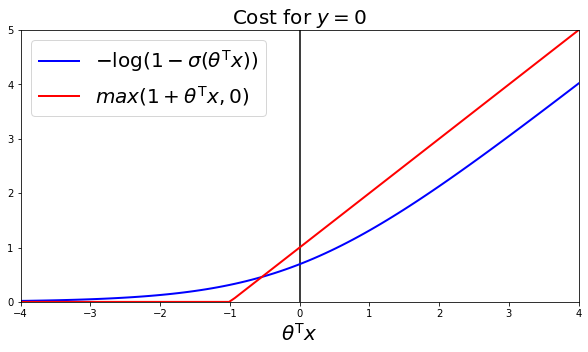

In [6]:
cost_zero = -np.log(1-sig)
cost_zero_hinge = np.maximum(1 + t, np.zeros(t.size))
plt.figure(figsize=(10, 5))
plt.plot([0, 0], [0, 5], "k-")
plt.plot(t, cost_zero, "b-", linewidth=2, label=r"$-\log{(1-\sigma(\theta^{\rm T} x))}$")
plt.xlabel(r"$\theta^{\rm T} x$", fontsize=20)
plt.axis([-4, 4, 0, 5]);
plt.title('Cost for $y=0$', fontsize=20);
plt.plot(t, cost_zero_hinge, "r-", linewidth=2, label=r"$max(1+\theta^{\rm T} x, 0)$")
plt.legend(loc="upper left", fontsize=20);

### Negative training instances

For $y^{(i)}=0$, replace $-\log(1-\sigma(\theta^{\rm T} x))$ with *hinge loss* $\max(1 + \theta^{\rm T} x, 0)$.

For training, we want not just $\theta^{\rm T} x < 0$ but $\theta^{\rm T} x \leq -1$. 

### Exercise: plot cost $-\log(1-\sigma(\theta^{\rm T} x))$ and hinge loss $\max(1 + \theta^{\rm T} x, 0)$.

## Replace costs with hinge loss functions

Recall logistic regression with $\ell_2$ regularisation cost function is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right]
+
\frac{\lambda}{2m}
\sum_{j=1}^n \theta_j^2.
$$

Replace costs for $y^{(i)}=1$ and $y^{(i)}=0$ with hinge losses given above:
$$
\min_\theta
\sum_{i=1}^m 
\left [ 
y^{(i)} 
\max(1 - \theta^{\rm T} x^{(i)}, 0)
+
(1 - y^{(i)}) 
\max(1 + \theta^{\rm T} x^{(i)}, 0)
\right]
+
\frac{\lambda}{2}
\sum_{j=1}^n \theta_j^2.
$$

Introduce $k^{(i)}=1$ for positive instances ($y^{(i)}=1$) and $k^{(i)}=-1$ for negative instances ($y^{(i)}=0$):
$$
%
\Rightarrow
%
\min_\theta
C
\sum_{i=1}^m 
\max(1 - k^{(i)} \theta^{\rm T} x^{(i)}, 0)
+
\frac{1}{2}
\sum_{j=1}^n \theta_j^2
$$

The convention is to weight the fidelity term by C rather than regularisation term by $\lambda$ (thus $C$ plays the role of $1/\lambda$).
- Large $C$ $\rightarrow$ little regularisation 
- Small $C$ $\rightarrow$ greater regularisation

## Constrained objective problem

So far we considered the *unconstrained* objective problem by adapting the logistic regression cost function:
$$
\min_\theta
C
\sum_{i=1}^m 
\max(1 - k^{(i)} \theta^{\rm T} x^{(i)}, 0)
+
\frac{1}{2}
\sum_{j=1}^n \theta_j^2
$$

We can also consider the *constrained* objective problem:
$$
\min_\theta
\frac{1}{2}
\sum_{j=1}^n \theta_j^2
\quad
\text{subject to}
\quad
k^{(i)} \theta^{\rm T} x^{(i)} \geq 1 \ \text{for}\ i=1,2,\ldots,m
$$

(Follows intuitively by considering large $C$.)

## Intuition for large margin classification

Decision boundary defined by $\theta^{\rm T} x + b = 0$ (where here $\theta$ does *not* include bias and $b=\theta_0$; in notation above $\theta$ did include bias, i.e. $\theta_0$ term).

Consequently, $\theta$ is orthogonal to decision boundary.

Recall constrained objective:
$$
\min_\theta
\frac{1}{2}
\sum_{j=1}^n \theta_j^2
\quad
\text{subject to}
\quad
k^{(i)} \theta^{\rm T} x^{(i)} \geq 1 \ \text{for}\ i=1,2,\ldots,m
$$

### Projection

Note that the term $k^{(i)} \theta^{\rm T} x^{(i)}$ is related to the projection of $x^{(i)}$ onto $\theta$:
$$k^{(i)} \theta^{\rm T} x^{(i)} = p^{(i)} \| \theta \|,$$

where $ p^{(i)}$ is the projection of $x^{(i)}$ onto $\theta$.

Attempting to minimise $\| \theta \|$, hence requires $p^{(i)}$ to be large $\Rightarrow$ large margin classification.

## Graphical illustration

<center><img src="Lecture09_Images/SVM_optimize_cropped.png" style="height: 400px;"/></center>

(Note difference notation used: $w=\theta$ without bias.)

[[Image source](http://www.saedsayad.com/support_vector_machine.htm)]


# Training SVMs

In [7]:
# Common imports
import os
import numpy as np
np.random.seed(42) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Load data and train

In [9]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Plot decision boundaries

In [10]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
#pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [11]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # On the margin, w0*x0 + w1*x1 + b = +/- 1
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

[0, 5.5, 0, 2]

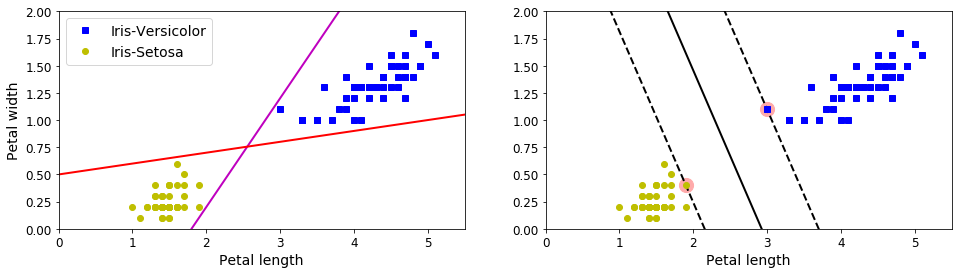

In [12]:
plt.figure(figsize=(16,4))

plt.subplot(121)
#plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

Adding training instances outside the margin will not alter the decision boundary.  

Boundary is defined by *support vectors* that are located on the edge of the margin.

### Exercise: what value would you guess for the weights $\theta$ (excluding the bias)?

## Feature scaling

SVMs are sensitive to feature scales, hence feature scaling is important if features not already of similar scale.

[0, 6, 0, 90]

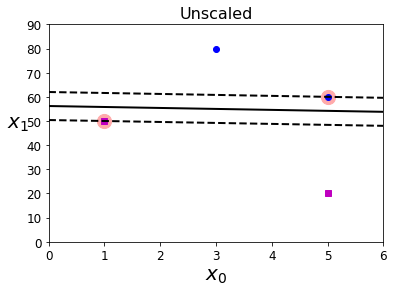

In [13]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

#plt.figure(figsize=(16,4))
#plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])


[-2, 2, -2, 2]

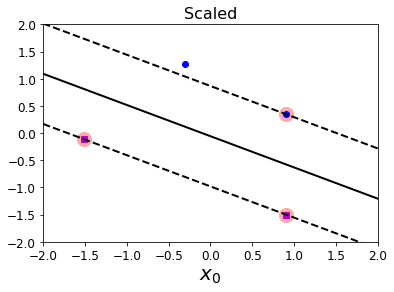

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

#plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])


## Hard margin classification

Hard margin classification corresponds to strictly imposing all training instances correctly classfied.

### Problems with hard margin classification
- Can fail if data not linearly separable.
- Sensitive to outliers.

In [15]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[0, 5.5, 0, 2]

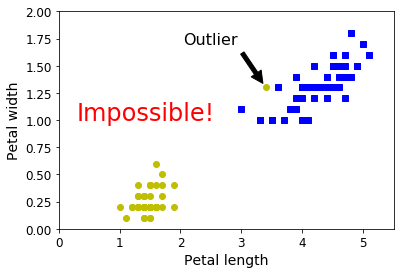

In [16]:
# plt.figure(figsize=(16,5))
# plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

[0, 5.5, 0, 2]

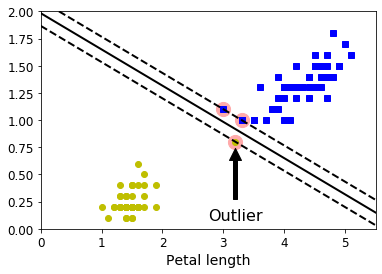

In [17]:
# plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

## Soft margin classification


Allow some margin violations by varying hyperparameter $C$.


Recall, large $C$ corresponds to small regularisation and thus few margin violoations.  Small $C$ corresponds to greater regularisation and thus more margin violations.

### Load data

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

### Train SVMs

In [19]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ))
scaled_svm_clf2 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ))

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

### Compute support vectors

In [20]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1 # t = +/-1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

### Plot

[4, 6, 0.8, 2.8]

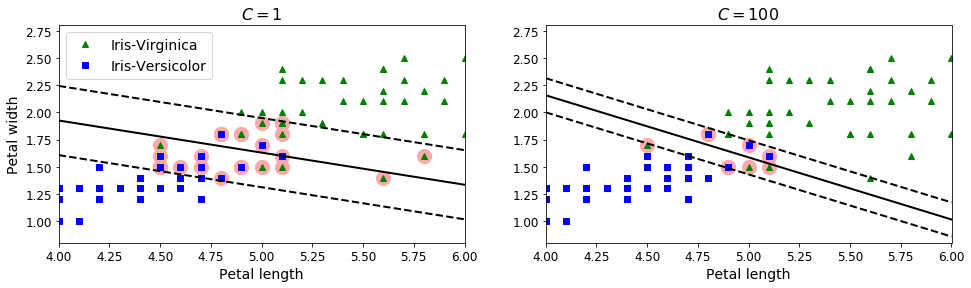

In [21]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

# Non-linear classification with polynomial features

So far we have considered linear classification only.

Most data-sets are not linearly separable.

### 1D example 

Consider 1D feature space with $x_1$, which is clearly not linearly separable.

However, if augment feature space with $x_2=(x_1)^2$ we see that the resulting 2D feature space is linearly separable.

In [22]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

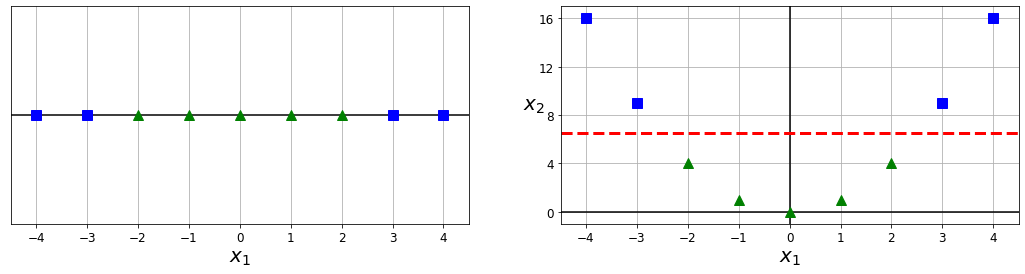

In [23]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs", markersize=10)
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^", markersize=10)
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs", markersize=10)
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^", markersize=10)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

### 2D example

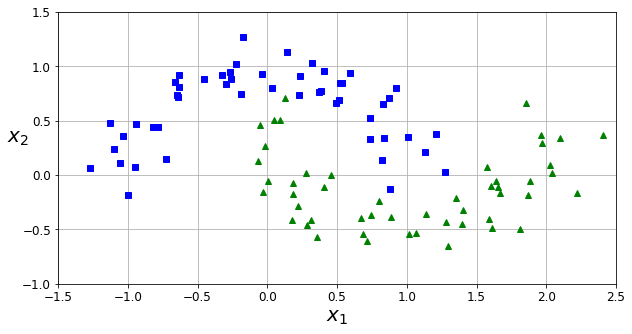

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plt.figure(figsize=(10, 5))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [25]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ))

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

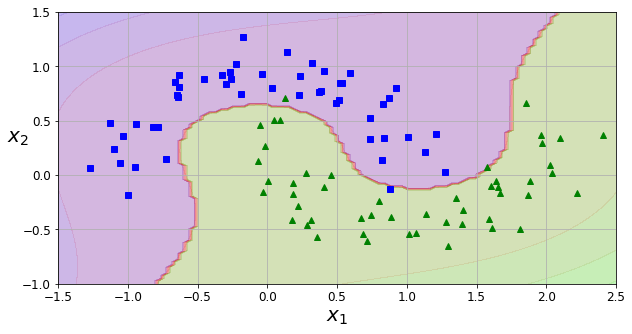

In [26]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(10,5))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

Adding polynomial features leads to a combinatorial increase in the dimensionality of the feature space and thus is computationally costly.

There are much better ways to perform non-linear classification with SVMs, where computational tricks can be exploited...

# Non-linear classification with kernels

## Similarity features and landmarks

Compute new features based on proximity to landmarks.

Consider landmarks $l^{(1)}$, $l^{(2)}$, $\ldots$

Then for each training instance $x$, compute features $f_j = \text{sim}(x, l^{(j)})$, where $\text{sim(.,.)}$ defines a *similarity* function.



## Similarity functions

The Gaussian radial basis function (RBF) is a common *similarity function*:
$$
\phi_\gamma(x,l) = exp( - \gamma \| x-l \|^2),
$$
where $\gamma$ controls the width of the kernel.



## 1D example (from above)

Consider landmarks at $x_1=-2$ and $x_1=1$.

In [27]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

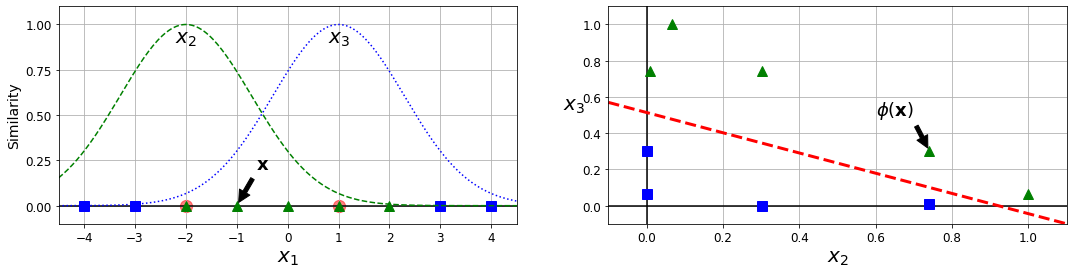

In [28]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs", markersize=10)
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^", markersize=10)
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs", markersize=10)
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^", markersize=10)
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

Training data *are* linearly separable in new feature space.

### Exercise: What are new feature values corresponding to the instance at $x_1=-1$ ($\gamma=0.3$)?

$x_2 = \exp(-0.3 \times (1)^2) = 0.74$

$x_3 = \exp(-0.3 \times (2)^2) = 0.30$

In [30]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


# How set landmarks?

Common approach is to set a landmark at the location of each instance in the training data-set.

## Kernel trick

For SVMs it is not necessary to actually compute new features for each kernel.

Instead, can be done implicitly, providing *considerable* computational saving.

SVM are well suited for small to medium sized data-sets, with complex structure.

The kernel trick is based on Mercer's theorem.

### Mercer's theorem

For (feature) mapping function $\phi(x)$, the inner product of two transformed vectors can be computed implicitly by the evaluation of the kernel function $K$ by
$$
K(x,z) = \langle \phi(x), \phi(z) \rangle .
$$

There is therefore no need to explicitly compute $\phi(x)$.

Moreoever, it is not necessary to even know the explicit form of the (feature) mapping function $\phi(x)$.


(We will not cover the kernel trick and Mercer's theorem in any further detail.)

## Common kernels

Some common similarity function, or *kernel*, include the following.

1. Gaussian radial basis function (RBF):
$$
K_\gamma(x,l) = exp( - \gamma \| x-l \|^2),
$$
where $\gamma$ controls the width of the kernel.

2. Polynomial kernel:
$$
K_{c, d}(x,l) = (x^{\rm T}l + c)^d,
$$
for constant offset $c$ and degree $d$.

3. Linear kernel, i.e. linear SVM:
$$
K(x,l) = x^{\rm T}l.
$$


## 2D example (from above)

In [31]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ))
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

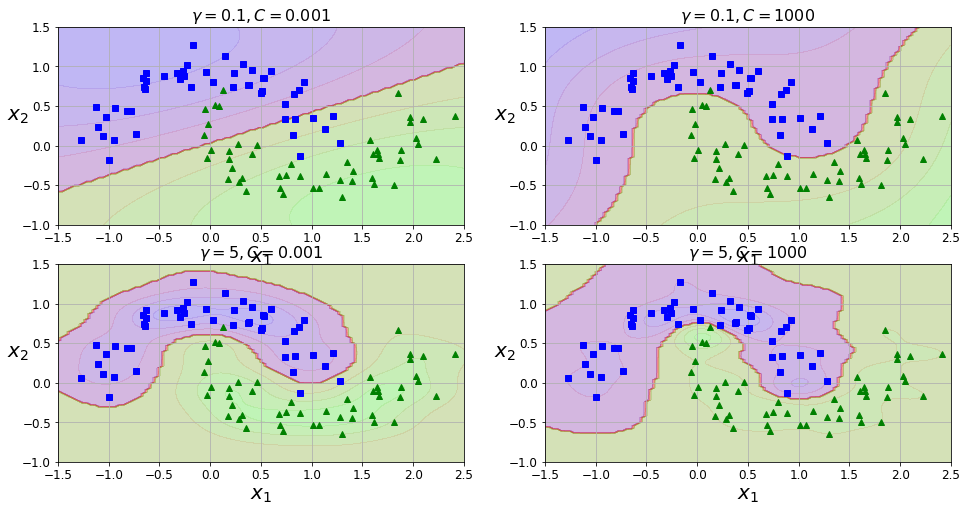

In [32]:
plt.figure(figsize=(16, 8))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

# Regression

Can also use SVMs to perform regression, in addition to classification.

General idea is to reverse the objective: rather than fitting the largest possible margin between two classes, SVM regression fits as many instances as possible within the margin. 

The width of the margin is controlled by the hyperparameter $\epsilon$.

## Linear regression

In [33]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [34]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [35]:
eps_y_pred

array([6.52640746])

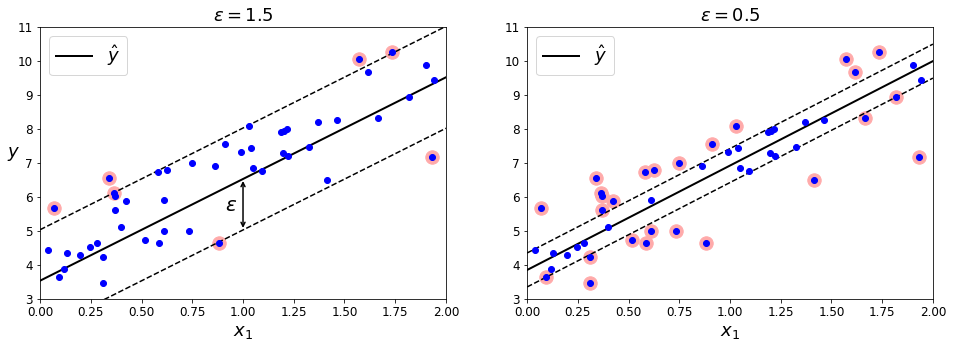

In [36]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(16, 5))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18);

## Non-linear regression

In [37]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [38]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y);
svm_poly_reg2.fit(X, y);

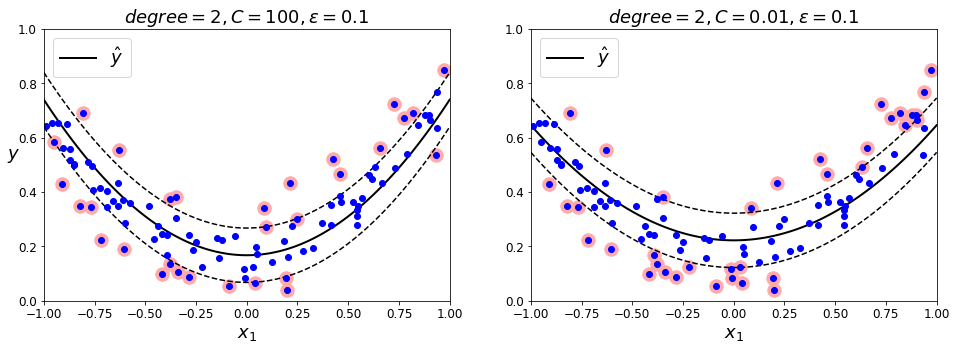

In [39]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2 , X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18);